# Downloading bitcoin price data

In [4]:
import yfinance as yf  # Library for downloading historical market data from Yahoo Finance
import os              # Library for interacting with the operating system
import pandas as pd    # Library for data manipulation and analysis
import numpy as np     # Library for numerical operations
import matplotlib.pyplot as plt  # Library for data visualisation
import joblib          # Library for saving and loading trained model


In [5]:
# Create a Ticker object for Bitcoin/US Dollar pair
btc_ticker = yf.Ticker("BTC-USD")


In [6]:
# Fetch historical market data for Bitcoin with the maximum available period
btc = btc_ticker.history(period='max')


In [7]:
# Display the historical market data for Bitcoin
btc


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-12 00:00:00+00:00,58719.394531,60680.332031,57688.898438,59354.515625,37078637820,0.0,0.0
2024-08-13 00:00:00+00:00,59356.207031,61572.398438,58506.253906,60609.566406,30327698167,0.0,0.0
2024-08-14 00:00:00+00:00,60611.050781,61687.757812,58472.875000,58737.269531,29961696180,0.0,0.0


In [8]:
# Remove timezone information from the DataFrame's index
btc.index = btc.index.tz_localize(None)


In [9]:
# Remove the 'Dividends' and 'Stock Splits' columns from the DataFrame
del btc["Dividends"]
del btc["Stock Splits"]


In [10]:
# Convert column names to lowercase for consistency
btc.columns = [c.lower() for c in btc.columns]


<Axes: xlabel='Date'>

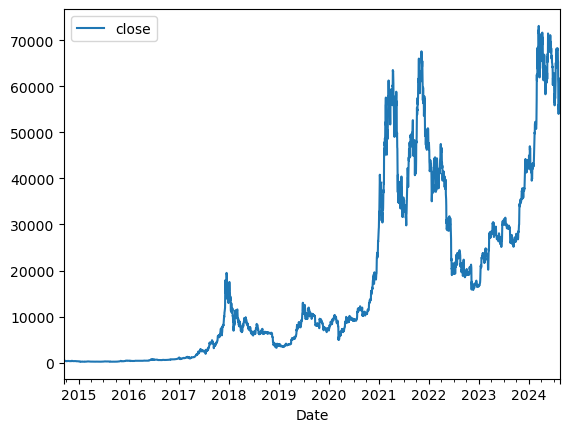

In [11]:
# Plot the closing prices of Bitcoin over time
btc.plot.line(y='close', use_index=True)


In [12]:
# Load the Wikipedia edits data from a CSV file, setting the first column as the index and parsing dates
wiki = pd.read_csv("D:/VSCode Folders/Bitcoin Prediction/wikipedia edits.csv", index_col=0, parse_dates=True)


In [13]:
# Display the Wikipedia edits DataFrame
wiki


,edit_count,sentiment,neg_sentiment
2009-03-22,0.266667,-0.036702,0.050000
2009-03-23,0.000000,0.000000,0.000000
2009-03-24,0.000000,0.000000,0.000000
2009-03-25,0.000000,0.000000,0.000000
2009-03-26,0.000000,0.000000,0.000000
...,...,...,...
2024-08-12,0.200000,-0.046573,0.133333
2024-08-13,0.133333,-0.000115,0.066667
2024-08-14,0.133333,-0.000115,0.066667
2024-08-15,0.133333,-0.000130,0.066667


# Preparing data for machine learning

In [14]:
# Merge the Bitcoin data with the Wikipedia edits data on the index (dates)
btc = btc.merge(wiki, left_index=True, right_index=True)


In [15]:
# Display the merged DataFrame containing both Bitcoin data and Wikipedia edits
btc


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,3.600000,-0.210959,0.513422
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,3.266667,-0.263395,0.541993
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,3.466667,-0.228847,0.508660
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,3.400000,-0.208723,0.497549
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,3.333333,-0.195046,0.486438
...,...,...,...,...,...,...,...,...
2024-08-12,58719.394531,60680.332031,57688.898438,59354.515625,37078637820,0.200000,-0.046573,0.133333
2024-08-13,59356.207031,61572.398438,58506.253906,60609.566406,30327698167,0.133333,-0.000115,0.066667
2024-08-14,60611.050781,61687.757812,58472.875000,58737.269531,29961696180,0.133333,-0.000115,0.066667
2024-08-15,58733.261719,59838.648438,56161.593750,57560.097656,35682112440,0.133333,-0.000130,0.066667


In [16]:
# Create a new column 'tomorrow' that contains the closing price shifted by one day
btc['tomorrow'] = btc['close'].shift(-1)


In [17]:
# Display the DataFrame with the newly added 'tomorrow' column
btc


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,3.600000,-0.210959,0.513422,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,3.266667,-0.263395,0.541993,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,3.466667,-0.228847,0.508660,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,3.400000,-0.208723,0.497549,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,3.333333,-0.195046,0.486438,402.152008
...,...,...,...,...,...,...,...,...,...
2024-08-12,58719.394531,60680.332031,57688.898438,59354.515625,37078637820,0.200000,-0.046573,0.133333,60609.566406
2024-08-13,59356.207031,61572.398438,58506.253906,60609.566406,30327698167,0.133333,-0.000115,0.066667,58737.269531
2024-08-14,60611.050781,61687.757812,58472.875000,58737.269531,29961696180,0.133333,-0.000115,0.066667,57560.097656
2024-08-15,58733.261719,59838.648438,56161.593750,57560.097656,35682112440,0.133333,-0.000130,0.066667,58848.136719


In [18]:
# Create a binary 'target' column indicating whether the closing price tomorrow is higher than today's closing price
btc['target'] = (btc["tomorrow"] > btc['close']).astype(int)


In [19]:
# Display the count of each unique value in the 'target' column
btc["target"].value_counts()


target
1    1913
0    1709
Name: count, dtype: int64

# Training our baseline ML model

In [20]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier for classification tasks
from sklearn.model_selection import GridSearchCV       # Import GridSearchCV for hyperparameter tuning
from sklearn.metrics import precision_score           # Import precision_score to evaluate classification performance


In [21]:
# Split the data into training and test sets
train = btc.iloc[:-200]  # Training data: all rows except the last 200
test = btc[-200:]       # Test data: the last 200 rows


In [22]:
# Define the predictors used in the model
predictors = ['close', 'volume', 'open', 'high', 'low', 'edit_count', "sentiment", 'neg_sentiment']


In [23]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 10, 50],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# Initialize variables to store the best score and best parameters
best_score = -np.inf
best_params = None

# Perform a manual grid search without cross-validation
for n_estimators in param_grid['n_estimators']:
    for min_samples_split in param_grid['min_samples_split']:
        for max_depth in param_grid['max_depth']:
            for max_features in param_grid['max_features']:
                
                # Create and fit the model with the current set of hyperparameters
                model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    min_samples_split=min_samples_split,
                    max_depth=max_depth,
                    max_features=max_features,
                    random_state=1
                )
                model.fit(train[predictors], train['target'])
                
                # Evaluate the model on the training data
                score = model.score(train[predictors], train['target'])
                
                # Update the best score and best parameters if the current model is better
                if score > best_score:
                    best_score = score
                    best_params = {
                        'n_estimators': n_estimators,
                        'min_samples_split': min_samples_split,
                        'max_depth': max_depth,
                        'max_features': max_features
                    }

# Create the final model with the best parameters
model = RandomForestClassifier(
    **best_params,
    random_state=1
)

# Fit the final model on the training data
model.fit(train[predictors], train['target'])

# Print the best hyperparameters found
print(f"Best parameters: {best_params}")


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None, 'max_features': 'sqrt'}


In [24]:
# Fit the RandomForestClassifier model on the training data with specified predictors and target
model.fit(train[predictors], train['target'])


RandomForestClassifier(random_state=1)

In [25]:
# Predict the target values for the test dataset using the trained model
preds = model.predict(test[predictors])


In [26]:
# Convert the predictions array to a pandas Series with the same index as the test set
preds = pd.Series(preds, index=test.index)


In [27]:
# Calculate the precision score of the model on the test set
precision_score(test['target'], preds)


0.5714285714285714

# Evaluating error with backtesting

In [28]:
def predict(train, test, predictors, model):
    """
    Fit the model on the training data and predict on the test data.

    Parameters:
    - train (pd.DataFrame): Training data
    - test (pd.DataFrame): Test data
    - predictors (list): List of predictor column names
    - model: Machine learning model (e.g., RandomForestClassifier)

    Returns:
    - pd.DataFrame: DataFrame containing actual and predicted values
    """
    model.fit(train[predictors], train['target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='predictions')
    
    # Calculate and print precision score
    precision = precision_score(test['target'], preds)
    print(f'Precision: {precision}')
    
    combined = pd.concat([test['target'], preds], axis=1)
    return combined


In [29]:
def backtest(data, model, predictors, start=1095, step=150):
    """
    Perform backtesting by training and testing the model at different intervals.

    Parameters:
    - data (pd.DataFrame): Complete dataset for backtesting
    - model: Machine learning model to be used for prediction
    - predictors (list): List of predictor column names
    - start (int): Index to start the first test
    - step (int): Number of rows to use for each test segment

    Returns:
    - pd.DataFrame: Concatenated DataFrame of all predictions
    """
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i]
        test = data.iloc[i:(i+step)]
        
        # Call the predict function and store the predictions
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    # Return the collected predictions
    return pd.concat(all_predictions)


# Using an XGBoost model

In [30]:
from xgboost import XGBClassifier  # Import the XGBClassifier from the xgboost library


In [31]:
# Define the parameter grid for XGBoost hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1],  # Step size shrinkage
    'max_depth': [3, 6, 9],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
    'subsample': [0.6, 1.0],  # Fraction of samples to use for fitting
    'colsample_bytree': [0.6, 1.0],  # Fraction of features to use for each tree
    'gamma': [0, 0.1]  # Minimum loss reduction required to make a further partition
}

# Initialize the XGBClassifier
xgb = XGBClassifier(random_state=1)

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb,  # The model to be tuned
    param_grid=param_grid,  # The parameter grid to search
    scoring='accuracy',  # Evaluation metric
    n_jobs=-1,  # Use all available cores
    cv=5,  # Number of cross-validation folds
    verbose=1  # Verbosity level
)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(train[predictors], train['target'])

# Output the best parameters and the best model
print("Best parameters:", grid_search.best_params_)
model = grid_search.best_estimator_  # The model with the best parameters


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}


In [32]:
# Perform backtesting using the final model and print the predictions
predictions = backtest(btc, model, predictors)
print(predictions)


Precision: 0.5423728813559322
Precision: 0.53125
Precision: 0.488
Precision: 0.6585365853658537
Precision: 0.5042016806722689
Precision: 0.47368421052631576
Precision: 0.5164835164835165
Precision: 0.6571428571428571
Precision: 0.48
Precision: 0.5942028985507246
Precision: 0.42857142857142855
Precision: 0.4603174603174603
Precision: 0.4909090909090909
Precision: 0.5166666666666667
Precision: 0.4888888888888889
Precision: 0.6
Precision: 0.5
            target  predictions
2017-09-16       0            1
2017-09-17       1            1
2017-09-18       0            1
2017-09-19       0            1
2017-09-20       0            1
...            ...          ...
2024-08-12       1            1
2024-08-13       0            1
2024-08-14       0            1
2024-08-15       1            0
2024-08-16       0            0

[2527 rows x 2 columns]


In [33]:
# Print the backtesting predictions
print(predictions)


            target  predictions
2017-09-16       0            1
2017-09-17       1            1
2017-09-18       0            1
2017-09-19       0            1
2017-09-20       0            1
...            ...          ...
2024-08-12       1            1
2024-08-13       0            1
2024-08-14       0            1
2024-08-15       1            0
2024-08-16       0            0

[2527 rows x 2 columns]


In [34]:
# Calculate and print the precision score
precision = precision_score(predictions['target'], predictions['predictions'])
print(f'Precision Score: {precision}')


Precision Score: 0.5134146341463415


# Improving precision with trends

In [35]:
def compute_rolling(btc):
    horizons = [2, 7, 60, 365]  # Define different time horizons for rolling calculations
    new_predictors = ['close', 'sentiment', 'neg_sentiment']  # Initial predictors
    
    for horizon in horizons:
        # Calculate rolling averages for the given horizon
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()
        
        # Create new columns for rolling ratios and averages
        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc['close'] / rolling_averages['close']
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages['edit_count']
        
        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling['target']
        
        # Update the list of predictors with the new columns
        new_predictors += [ratio_column, trend_column, edit_column]
    
    return btc, new_predictors


In [36]:
btc, new_predictors = compute_rolling(btc.copy())  # Apply the rolling computations and get updated data and predictors


In [37]:
btc  # Display the updated DataFrame after applying the rolling computations


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,3.600000,-0.210959,0.513422,424.440002,0,...,NaN,1.000000,3.600000,NaN,1.000000,3.600000,NaN,1.000000,3.600000,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,3.266667,-0.263395,0.541993,394.795990,0,...,0.0,0.962696,3.433333,0.000000,0.962696,3.433333,0.000000,0.962696,3.433333,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,3.466667,-0.228847,0.508660,408.903992,1,...,0.0,0.927789,3.444444,0.000000,0.927789,3.444444,0.000000,0.927789,3.444444,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,3.400000,-0.208723,0.497549,398.821014,0,...,0.5,0.970419,3.433333,0.333333,0.970419,3.433333,0.333333,0.970419,3.433333,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,3.333333,-0.195046,0.486438,402.152008,1,...,0.5,0.956729,3.413333,0.250000,0.956729,3.413333,0.250000,0.956729,3.413333,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,58719.394531,60680.332031,57688.898438,59354.515625,37078637820,0.200000,-0.046573,0.133333,60609.566406,1,...,0.5,1.006809,0.457143,0.571429,0.952377,0.270000,0.450000,1.195459,1.945753,0.512329
2024-08-13,59356.207031,61572.398438,58506.253906,60609.566406,30327698167,0.133333,-0.000115,0.066667,58737.269531,0,...,1.0,1.016824,0.400000,0.571429,0.973922,0.271111,0.466667,1.218639,1.942466,0.512329
2024-08-14,60611.050781,61687.757812,58472.875000,58737.269531,29961696180,0.133333,-0.000115,0.066667,57560.097656,0,...,0.5,0.976729,0.333333,0.571429,0.945725,0.272222,0.450000,1.179073,1.938995,0.512329
2024-08-15,58733.261719,59838.648438,56161.593750,57560.097656,35682112440,0.133333,-0.000130,0.066667,58848.136719,1,...,0.0,0.966684,0.266667,0.428571,0.929034,0.273333,0.433333,1.153612,1.935342,0.512329


In [38]:
# Perform backtesting using the updated predictors and model
predictions = backtest(btc, model, new_predictors)


Precision: 0.5943396226415094
Precision: 0.5368421052631579
Precision: 0.46875
Precision: 0.6619718309859155
Precision: 0.488
Precision: 0.35294117647058826
Precision: 0.4782608695652174
Precision: 0.6341463414634146
Precision: 0.5154639175257731
Precision: 0.55
Precision: 0.5066666666666667
Precision: 0.504950495049505
Precision: 0.49074074074074076
Precision: 0.5301204819277109
Precision: 0.4852941176470588
Precision: 0.5757575757575758
Precision: 0.4835164835164835


In [39]:
# Calculate and the precision score for the predictions
precision = precision_score(predictions['target'], predictions['predictions'])

In [40]:
# Save the best model to a file
joblib.dump(model, 'D:/VSCode Folders/Bitcoin Prediction/best_xgb_model.pkl')

print('Model Saved successfully.')

Model Saved successfully.


# Generating future predictions

In [41]:
predictions # Print the predictions DataFrame

,target,predictions
2017-09-16,0,1
2017-09-17,1,1
2017-09-18,0,1
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2024-08-12,1,1
2024-08-13,0,1
2024-08-14,0,1
2024-08-15,1,1
